# Implementing a basic Naive-Bayes algorithm
<hr/>

## 1. Introduction

This is an implementation of the Naive Bayes classifiction algorithm, done in the form of a learning project. This algorithm is based on a probabilistic approach; the "Bayes" part of the title referring to Bayesian Conditional Probability. The naiveity is introduced in the fact that the features/attributes considered are taken to be independent of each other.
<hr/>


## 2 About the dataset

The dataset used will be the "Pima Indians Diabetes Dataset". This dataset is used to determine whether a given patient is either diabetic or not based on numerous factors:

1. Number of times pregenant
2. Plasma glucose concentration 
3. Diastolic blood pressure
4. Triceps skin fold thickness
5. 2-Hour serum insulin
6. Body-Mass index
7. Diabetes pedigree function
8. Age

The last attribute in the table is the class variable, to show if the patient has diabetes or not.

The data is stored in a CSV file. It consists of 768 data entries. 

Click [here](https://gist.github.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7) to open and download the CSV file.


## 2.1 Understanding the data

In [1]:
! head pima-indians-diabetes.csv

1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


<br/>
It must be noted that the first line in the file consists of the column names, which must be removed while training the model
<hr/>

## 3. Implementing the program

### 3.1. Importing the modules

The following modules are required for reading a CSV file, for math functions involved and for spliting the dataset randomly respectively.

In [2]:
import csv
import math
import random

### 3.2. Defining the functions

The program can be sectioned into parts:

1. Load data
2. Split data into training and testing sets
3. Summarize the data based on class
4. Make a prediction
5. Check the accuracy

### 3.3. Loading the data

The data needs to be loaded into a list. The first line, which consists of the column name needs to be removed, and all the values need to be changed to float values. This is done with the loadCSV() function, defined as below.

In [3]:
def loadCSV():
    lines = csv.reader(open(r'pima-indians-diabetes.csv'))
    data = list(lines)
    data = data[1:]
    
    for i in range(len(data)):
        data[i] = [float(x) for x in data[i]]
        
    return data

### 3.4 Spliting the data into testing and training set

Data now needs to be split into testing and training the set. The partitioning is determined by the value of the 'splitRatio'. Generally a value near 0.7 to 0.8 is taken. Data for the training set is choosen randomly from the input dataset, and the test is considered the training set.

In [4]:
def splitData(data, splitRatio):
    trainSize = int(len(data) * splitRatio)
    trainSet = []
    testSet = list(data)
    
    while len(trainSet) < trainSize:
        index = random.randrange(len(testSet))
        trainSet.append(testSet.pop())
        
    return [trainSet, testSet]

### 3.5 Spliting the data based on the class

To find the properties of different attribute of the data, the dataset needs to be divided into its different classes; that is either diabetic or not diabetic. This attribute is stored as the last element in the list.

In [5]:
def seperateByClass(data):
    seperated = {}
    
    for i in range(len(data)):
        vector = data[i]
        if(vector[-1] not in seperated):
            seperated[vector[-1]] = []
            
        seperated[vector[-1]].append(vector)
        
    return seperated

### 3.6 Required mathematical functions

Our choice of the classifier can vary based on the type of distribution we are dealing with. These can be Gaussian(also known as normal), Multinomial or Bernoulli.

Our Naive Bayes classifier uses the Gaussian distribution. This requires us to find the mean and standard deviation of the data. Given these values, the probability for a given class can be calculated.

![Naive Bayes Equation from Wikipedia](https://wikimedia.org/api/rest_v1/media/math/render/svg/685339e22f57b18d804f2e0a9c507421da59e2ab "Naive Bayes Equation from Wikipedia")

In [6]:
def mean(data):
    return sum(data)/float(len(data))

In [7]:
def stddev(data):
    avg = mean(data) 
    var = (sum(pow(x-avg, 2) for x in data))/float(len(data)-1) # Using Bassel Correction 
    
    return math.sqrt(var)

In [8]:
def calculateProbability(data, mean, stddev):
    exp = math.exp((-(math.pow(data-mean, 2)))/float(2*math.pow(stddev, 2)))
    return 1/(math.sqrt(2*math.pi*math.pow(stddev, 2))) * exp

### 3.7 Summarization of data

The summarizeByClass() function is used to find the mean of the attributes for each class. These functions call the mathematical functions described above and calculate the values. The last value will be a junk value as it is used to differentiate the category.

In [9]:
def summarize(data):
    summaries = [(mean(attribute), stddev(attribute)) for attribute in zip(*data)]
    
    del summaries[-1]
    return summaries

In [10]:
def summarizeByClass(data):
    seperated = seperateByClass(data)
    summaries = {}
    for classValue, instances in seperated.items():
        summaries[classValue] = summarize(instances)
        
    return summaries

### 3.8 Predictions and Accuracy

Prediction is done by using the 'summaries' variable. The 'mean' and 'stddev' attributes are used to determine the probability of the current class, by plugging it into the probability function of the Gaussian distribution. The probability of both classes is determined, and the better label is returned. Here, the naiveity of the model can be noticed.

Accuracy is measured by finding the percentage of correct predictions.

In [11]:
def calculateClassProbability(summaries, vector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stddev = classSummaries[i]
            x = vector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stddev)
            
    return probabilities

In [12]:
def predict(summaries, vector):
    probabilities = calculateClassProbability(summaries, vector)
    bestLabel, bestProb = None, -1
    
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
            
    return bestLabel

In [13]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
        
    return predictions

In [14]:
def getAccuracy(testSet, predictions):
    correct = 0
    
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
            
    return (correct/float(len(testSet)))*100.0

### 3.9 The main() function

All function calls are encapsulated in the main function.

In [15]:
def main(splitRatio, verbose = 1):
    
    data = loadCSV()
    
    trainingSet, testSet = splitData(data, splitRatio)
    if verbose is 1:
        print("Split {0} rows into {1} training and {2} testing rows".format(len(data), len(trainingSet), len(testSet)))   
    
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    
    if verbose is 1:
        print("Accuracy : {0:.3f}%".format(accuracy))
        
    return accuracy

main(0.78)

Split 768 rows into 599 training and 169 testing rows
Accuracy : 74.556%


74.55621301775149

## 4. More information on the splitRatio

This is just to find the value of splitRatio required for getting the highest accuracy.

In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [17]:
X = np.arange(0.6, 1, 0.05)
y = []

In [18]:
for i in X:
    y.append(main(i, 0))

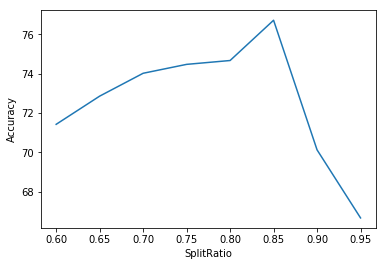

In [19]:
plt.xlabel('SplitRatio')
plt.ylabel('Accuracy')

max_y = max(y)
xpos = y.index(max_y)
max_x = X[xpos]

plt.plot(X, y)

From the above plot, the maximum accuracy is achieved when the splitRatio is near 0.85.

## 5. References

1. ["Youtube : Naive Bayes Classifier in Python"](https://youtu.be/vz_xuxYS2PM)
2. ["Wikipedia : Naive Bayes Classifier"](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
3. ["Pima Indian Diabetic Dataset" CSV File](https://gist.github.com/chaityacshah/899a95deaf8b1930003ae93944fd17d7)